### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
import re

In [2]:
df = pd.read_csv('train.txt',sep=";",header=None)
df.head()

,0,1
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [3]:
df.shape

(16000, 2)

### Renaming columns

In [4]:
# df.rename(columns={"i didnt feel humiliated":"sentence","sadness":"emotions"},inplace=True)
df.columns = ['sentence','emotions']
df.head(3)

,sentence,emotions
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger


In [5]:
df.shape

(16000, 2)

In [6]:
df.head()

,sentence,emotions
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


### Checking for null values and duplicates

In [7]:
df.isnull().sum()

sentence    0
emotions    0
dtype: int64

In [8]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [10]:
df["emotions"].value_counts()

joy         5361
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: emotions, dtype: int64

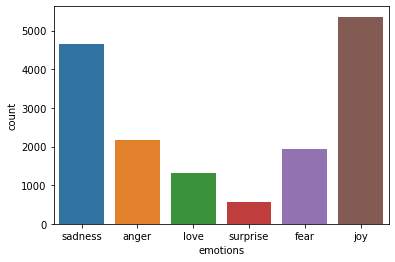

In [11]:
sns.countplot(data=df,x="emotions")
plt.show()

In [12]:
import re
import nltk
from nltk import word_tokenize, FreqDist

In [13]:
lm = WordNetLemmatizer()
sw = stopwords.words('English')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
import text_hammer as th

C:\ProgramData\Anaconda3\lib\site-packages\spacy\language.py:1895: UserWarning: [W123] Argument disable with value [] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  warnings.warn(


In [15]:
def text_preprocessing(df,col):
#     col = col_name
    df[col] = df[col].progress_apply(lambda x:str(x).lower())
    df[col] = df[col].progress_apply(lambda x: th.cont_exp(x))   
    df[col] = df[col].progress_apply(lambda x: th.remove_emails(x))
    df[col] = df[col].progress_apply(lambda x: th.remove_html_tags(x))
    df[col] = df[col].progress_apply(lambda x: th.remove_stopwords(x))
    df[col] = df[col].progress_apply(lambda x: th.remove_special_chars(x))
    df[col] = df[col].progress_apply(lambda x: th.make_base(x)) #ran -> run,
    return(df)

In [16]:
df = text_preprocessing(df, "sentence")

  0%|          | 0/15999 [00:00<?, ?it/s]

  0%|          | 0/15999 [00:00<?, ?it/s]

  0%|          | 0/15999 [00:00<?, ?it/s]

  0%|          | 0/15999 [00:00<?, ?it/s]

  0%|          | 0/15999 [00:00<?, ?it/s]

  0%|          | 0/15999 [00:00<?, ?it/s]

  0%|          | 0/15999 [00:00<?, ?it/s]

In [17]:
x = df['sentence']
y = df['emotions']
print(x.shape)
print(y.shape)

(15999,)
(15999,)


In [18]:
df["emotions"].value_counts()

joy         5361
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: emotions, dtype: int64

In [19]:
df_joy = df[df['emotions']=="joy"]
print(df_joy.shape)
df_sadness = df[df['emotions']=="sadness"]
print(df_sadness.shape)
df_anger = df[df['emotions']=="anger"]
print(df_anger.shape)
df_fear = df[df['emotions']=="fear"]
print(df_fear.shape)
df_love = df[df['emotions']=="love"]
print(df_love.shape)
df_surprise = df[df['emotions']=="surprise"]
print(df_surprise.shape)

(5361, 2)
(4666, 2)
(2159, 2)
(1937, 2)
(1304, 2)
(572, 2)


In [20]:
wt_joy =[]
for i in df_joy['sentence']:
    wt_joy.extend(word_tokenize(i))

freq_dist_joy = FreqDist(wt_joy).most_common(110)
print(freq_dist_joy)

[('feel', 5357), ('like', 1014), ('m', 939), ('I', 805), ('not', 451), ('feeling', 376), ('time', 330), ('s', 303), ('know', 284), ('want', 264), ('think', 263), ('t', 259), ('day', 240), ('love', 239), ('do', 233), ('go', 233), ('good', 229), ('people', 206), ('life', 195), ('thing', 194), ('little', 189), ('need', 187), ('pretty', 184), ('work', 175), ('look', 168), ('way', 161), ('come', 154), ('happy', 152), ('make', 144), ('get', 141), ('year', 134), ('right', 124), ('help', 119), ('today', 119), ('try', 118), ('find', 117), ('don', 114), ('sure', 110), ('well', 107), ('leave', 106), ('write', 104), ('start', 102), ('tell', 99), ('say', 94), ('bit', 92), ('have', 88), ('important', 87), ('friend', 86), ('long', 85), ('support', 83), ('lot', 82), ('glad', 81), ('read', 81), ('cool', 80), ('free', 80), ('excited', 79), ('able', 78), ('thankful', 78), ('hope', 77), ('new', 77), ('strong', 76), ('safe', 75), ('family', 75), ('live', 75), ('http', 74), ('confident', 73), ('wonderful', 

In [21]:
wt_sadness =[]
for i in df_sadness['sentence']:
    wt_sadness.extend(word_tokenize(i))

freq_dist_sadness = FreqDist(wt_sadness).most_common(110)
print(freq_dist_sadness)

[('feel', 4639), ('like', 875), ('m', 796), ('I', 689), ('not', 535), ('feeling', 431), ('know', 327), ('do', 276), ('t', 272), ('time', 266), ('want', 235), ('think', 234), ('day', 224), ('thing', 221), ('little', 194), ('s', 187), ('go', 186), ('life', 181), ('people', 180), ('bit', 170), ('way', 144), ('start', 136), ('need', 136), ('love', 133), ('work', 132), ('try', 130), ('leave', 126), ('good', 124), ('pretty', 121), ('don', 120), ('come', 114), ('bad', 114), ('look', 112), ('right', 111), ('friend', 110), ('can', 109), ('hate', 107), ('today', 107), ('get', 106), ('miss', 101), ('make', 98), ('year', 96), ('week', 96), ('find', 90), ('lose', 89), ('lot', 87), ('have', 87), ('help', 86), ('kind', 81), ('hurt', 81), ('stupid', 78), ('tell', 78), ('home', 77), ('low', 76), ('stress', 76), ('sorry', 75), ('ache', 74), ('sad', 74), ('write', 74), ('miserable', 73), ('pain', 73), ('say', 72), ('away', 70), ('guilty', 69), ('well', 68), ('awkward', 68), ('depressed', 68), ('ashamed',

In [22]:
wt_anger =[]
for i in df_anger['sentence']:
    wt_anger.extend(word_tokenize(i))

freq_dist_anger = FreqDist(wt_anger).most_common(110)
print(freq_dist_anger)

[('feel', 2120), ('m', 420), ('like', 391), ('I', 350), ('not', 270), ('feeling', 166), ('t', 143), ('time', 138), ('know', 136), ('want', 130), ('do', 124), ('think', 112), ('thing', 109), ('people', 106), ('little', 105), ('s', 104), ('way', 92), ('go', 86), ('angry', 85), ('day', 76), ('bit', 76), ('hate', 76), ('life', 73), ('get', 73), ('irritable', 70), ('fuck', 68), ('cold', 68), ('don', 68), ('start', 68), ('friend', 67), ('need', 66), ('can', 64), ('greedy', 63), ('come', 62), ('try', 62), ('resentful', 60), ('selfish', 59), ('wrong', 57), ('love', 57), ('irritated', 56), ('violent', 55), ('cranky', 55), ('mad', 55), ('work', 55), ('dissatisfied', 54), ('dangerous', 54), ('insult', 54), ('frustrated', 53), ('rude', 53), ('say', 51), ('rush', 51), ('jealous', 51), ('bitchy', 50), ('agitated', 50), ('right', 49), ('bother', 49), ('make', 49), ('bitter', 48), ('today', 48), ('good', 48), ('petty', 46), ('rebellious', 45), ('leave', 44), ('piss', 44), ('impatient', 42), ('stress',

In [23]:
wt_fear =[]
for i in df_fear['sentence']:
    wt_fear.extend(word_tokenize(i))

freq_dist_fear = FreqDist(wt_fear).most_common(110)
print(freq_dist_fear)

[('feel', 1928), ('m', 379), ('I', 326), ('like', 261), ('not', 179), ('little', 149), ('know', 147), ('feeling', 141), ('t', 123), ('bit', 117), ('want', 109), ('time', 108), ('do', 102), ('think', 101), ('people', 91), ('go', 88), ('s', 87), ('thing', 85), ('strange', 79), ('start', 79), ('nervous', 75), ('anxious', 71), ('day', 68), ('afraid', 68), ('way', 66), ('unsure', 64), ('vulnerable', 64), ('weird', 61), ('uncertain', 61), ('reluctant', 59), ('apprehensive', 58), ('scared', 58), ('shake', 57), ('paranoid', 55), ('insecure', 55), ('life', 54), ('overwhelmed', 54), ('pressured', 54), ('terrified', 54), ('leave', 54), ('come', 53), ('need', 52), ('work', 50), ('love', 50), ('intimidate', 50), ('hesitant', 50), ('make', 50), ('shy', 49), ('agitated', 49), ('uncomfortable', 48), ('find', 48), ('shaky', 48), ('helpless', 47), ('help', 46), ('write', 45), ('fearful', 44), ('threaten', 44), ('don', 43), ('right', 43), ('get', 42), ('look', 42), ('try', 42), ('tell', 39), ('talk', 38)

In [24]:
wt_love =[]
for i in df_love['sentence']:
    wt_love.extend(word_tokenize(i))

freq_dist_love = FreqDist(wt_love).most_common(110)
print(freq_dist_love)

[('feel', 1283), ('like', 365), ('m', 226), ('love', 215), ('I', 194), ('feeling', 143), ('not', 123), ('know', 97), ('want', 88), ('time', 82), ('s', 78), ('care', 78), ('t', 75), ('think', 69), ('sweet', 69), ('need', 65), ('passionate', 63), ('do', 63), ('long', 58), ('life', 58), ('people', 57), ('hot', 56), ('little', 55), ('support', 55), ('sympathetic', 55), ('lovely', 55), ('nostalgic', 48), ('go', 47), ('naughty', 47), ('way', 47), ('supportive', 46), ('horny', 46), ('day', 46), ('gentle', 44), ('loyal', 44), ('bless', 44), ('tender', 43), ('beloved', 43), ('romantic', 42), ('accept', 42), ('fond', 40), ('generous', 40), ('thing', 40), ('friend', 39), ('delicate', 38), ('start', 37), ('try', 36), ('don', 35), ('good', 34), ('bit', 34), ('look', 31), ('have', 30), ('live', 29), ('work', 29), ('let', 28), ('god', 28), ('faithful', 27), ('come', 27), ('tell', 27), ('family', 27), ('year', 26), ('find', 25), ('say', 25), ('make', 24), ('can', 24), ('help', 24), ('get', 24), ('hand

In [25]:
wt_surprise =[]
for i in df_surprise['sentence']:
    wt_surprise.extend(word_tokenize(i))

freq_dist_surprise = FreqDist(wt_surprise).most_common(110)
print(freq_dist_surprise)

[('feel', 549), ('m', 116), ('like', 91), ('I', 91), ('amazed', 67), ('feeling', 57), ('weird', 57), ('overwhelmed', 57), ('curious', 54), ('impressed', 53), ('not', 50), ('funny', 49), ('surprised', 48), ('strange', 46), ('little', 44), ('time', 41), ('amazing', 40), ('s', 35), ('think', 34), ('know', 32), ('people', 30), ('bit', 30), ('shocked', 28), ('do', 28), ('find', 28), ('daze', 28), ('remember', 26), ('t', 25), ('thing', 23), ('go', 22), ('life', 22), ('look', 22), ('way', 21), ('day', 20), ('make', 20), ('love', 20), ('work', 19), ('actually', 18), ('shock', 18), ('come', 17), ('get', 17), ('read', 16), ('start', 16), ('want', 16), ('pretty', 16), ('say', 15), ('year', 15), ('need', 15), ('new', 14), ('tell', 14), ('good', 14), ('friend', 13), ('book', 13), ('don', 13), ('see', 12), ('hear', 12), ('sit', 12), ('try', 12), ('stunned', 12), ('take', 11), ('sure', 11), ('family', 11), ('help', 11), ('world', 11), ('today', 11), ('long', 11), ('wake', 10), ('d', 10), ('child', 10

In [26]:
df_joy = pd.DataFrame(freq_dist_joy,columns=['joy_word','joy_count'])
df_joy.head()

,joy_word,joy_count
0,feel,5357
1,like,1014
2,m,939
3,I,805
4,not,451


In [27]:
df_sadness = pd.DataFrame(freq_dist_sadness,columns=['sadness_word','sadness_count'])
df_sadness.head()

,sadness_word,sadness_count
0,feel,4639
1,like,875
2,m,796
3,I,689
4,not,535


In [28]:
df_anger = pd.DataFrame(freq_dist_anger,columns=['anger_word','anger_count'])
df_anger.head()

,anger_word,anger_count
0,feel,2120
1,m,420
2,like,391
3,I,350
4,not,270


In [29]:
df_fear = pd.DataFrame(freq_dist_fear,columns=['fear_word','fear_count'])
df_fear.head()

,fear_word,fear_count
0,feel,1928
1,m,379
2,I,326
3,like,261
4,not,179


In [30]:
df_love = pd.DataFrame(freq_dist_love,columns=['love_word','love_count'])
df_love.head()

,love_word,love_count
0,feel,1283
1,like,365
2,m,226
3,love,215
4,I,194


In [31]:
df_surprise = pd.DataFrame(freq_dist_surprise,columns=['surprise_word','surprise_count'])
df_surprise.head()

,surprise_word,surprise_count
0,feel,549
1,m,116
2,like,91
3,I,91
4,amazed,67


In [32]:
master_df=pd.concat([df_joy,df_sadness,df_anger,df_fear,df_love,df_surprise])
master_df.head()

,joy_word,joy_count,sadness_word,sadness_count,anger_word,anger_count,fear_word,fear_count,love_word,love_count,surprise_word,surprise_count
0,feel,5357.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,like,1014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,m,939.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I,805.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,not,451.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
from wordcloud import WordCloud

In [34]:
freq_dist_joy = dict(freq_dist_joy)
print(freq_dist_joy)

{'feel': 5357, 'like': 1014, 'm': 939, 'I': 805, 'not': 451, 'feeling': 376, 'time': 330, 's': 303, 'know': 284, 'want': 264, 'think': 263, 't': 259, 'day': 240, 'love': 239, 'do': 233, 'go': 233, 'good': 229, 'people': 206, 'life': 195, 'thing': 194, 'little': 189, 'need': 187, 'pretty': 184, 'work': 175, 'look': 168, 'way': 161, 'come': 154, 'happy': 152, 'make': 144, 'get': 141, 'year': 134, 'right': 124, 'help': 119, 'today': 119, 'try': 118, 'find': 117, 'don': 114, 'sure': 110, 'well': 107, 'leave': 106, 'write': 104, 'start': 102, 'tell': 99, 'say': 94, 'bit': 92, 'have': 88, 'important': 87, 'friend': 86, 'long': 85, 'support': 83, 'lot': 82, 'glad': 81, 'read': 81, 'cool': 80, 'free': 80, 'excited': 79, 'able': 78, 'thankful': 78, 'hope': 77, 'new': 77, 'strong': 76, 'safe': 75, 'family': 75, 'live': 75, 'http': 74, 'confident': 73, 'wonderful': 73, 'can': 73, 'content': 72, 'ok': 72, 'week': 72, 'home': 72, 'd': 72, 'away': 71, 'take': 71, 'special': 70, 'person': 70, 'succes

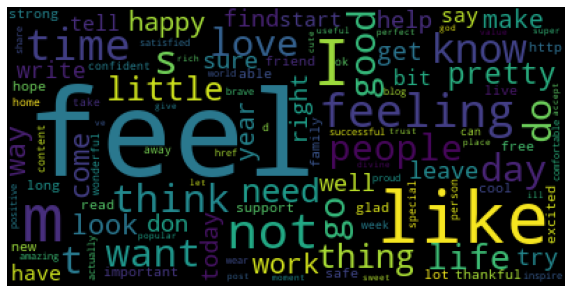

In [35]:
wc_joy = WordCloud().generate_from_frequencies(freq_dist_joy)
plt.figure(figsize=(10,10))
plt.imshow(wc_joy)
plt.axis('off')
plt.show()

In [36]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [37]:
max_words = 90000
max_len = 150

tk = Tokenizer(num_words=max_words)
tk.fit_on_texts(x)

print(len(tk.word_index))
print(tk.word_counts)

12101
OrderedDict([('do', 826), ('not', 1608), ('feel', 15876), ('humiliate', 46), ('hopeless', 65), ('damn', 39), ('hopeful', 59), ('care', 195), ('awake', 23), ('i', 2561), ('m', 2876), ('grab', 15), ('minute', 64), ('post', 177), ('greedy', 65), ('wrong', 111), ('nostalgic', 51), ('fireplace', 3), ('know', 1023), ('property', 4), ('grouchy', 27), ('little', 736), ('burdened', 6), ('lately', 98), ('was', 95), ('sure', 232), ('take', 212), ('milligram', 1), ('time', 965), ('recommend', 14), ('fall', 80), ('asleep', 18), ('lot', 264), ('fast', 28), ('like', 2997), ('funny', 69), ('confused', 58), ('life', 583), ('teenager', 19), ('jade', 38), ('year', 336), ('old', 151), ('man', 127), ('petronas', 1), ('petrona', 1), ('perform', 12), ('huge', 28), ('profit', 5), ('romantic', 51), ('suffer', 51), ('see', 143), ('mean', 176), ('run', 161), ('divine', 61), ('experience', 114), ('expect', 66), ('type', 54), ('spiritual', 11), ('encounter', 8), ('think', 813), ('s', 794), ('easy', 54), ('di

In [38]:
max_lenth = 150
sequences = tk.texts_to_sequences(x)
x_pad = pad_sequences(sequences,maxlen=max_len)

In [39]:
x_pad.shape

(15999, 150)

In [40]:
print(len(x_pad[50]))
print(len(x_pad[213]))

150
150


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding,Flatten,SpatialDropout1D
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [43]:
df['emotions'].value_counts()

joy         5361
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: emotions, dtype: int64

In [44]:
y_lab = lb.fit_transform(y)
from collections import Counter
print(Counter(y_lab))

Counter({2: 5361, 4: 4666, 0: 2159, 1: 1937, 3: 1304, 5: 572})


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(x_pad,y_lab, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(14399, 150) (14399,)
(1600, 150) (1600,)


In [47]:
vocab_size = max_words + 1
embedding_dim = 64
print(vocab_size)
print(embedding_dim)
print(x_pad.shape)

90001
64
(15999, 150)


In [78]:
# model = Sequential()
# model.add(Embedding(vocab_size, embedding_dim, input_length=x_pad.shape[1]))
# model.add(SpatialDropout1D(0.2))
# model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(13, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
Y_train[:5]

array([0, 1, 3, 4, 4])

In [50]:
m1 = Sequential()
m1.add(Embedding(vocab_size,embedding_dim,input_length=x_pad.shape[1]))    
m1.add(LSTM(200, return_sequences=True))
m1.add(Dropout(0.5))
m1.add(LSTM(200))
m1.add(Dropout(0.5))
m1.add(Dense(128))
m1.add(Dropout(0.5))
m1.add(Dense(6,activation='softmax'))

m1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [51]:
h1 = m1.fit(X_train,Y_train,batch_size=64,epochs=5,validation_data=(X_test,Y_test))

Epoch 1/5
225/225 [==============================] - 351s 2s/step - loss: 1.3231 - acc: 0.4609 - val_loss: 0.7738 - val_acc: 0.7287
Epoch 2/5
225/225 [==============================] - 382s 2s/step - loss: 0.4997 - acc: 0.8444 - val_loss: 0.3564 - val_acc: 0.8769
Epoch 3/5
225/225 [==============================] - 365s 2s/step - loss: 0.2016 - acc: 0.9341 - val_loss: 0.3157 - val_acc: 0.8869
Epoch 4/5
225/225 [==============================] - 369s 2s/step - loss: 0.1363 - acc: 0.9542 - val_loss: 0.3482 - val_acc: 0.8988
Epoch 5/5
225/225 [==============================] - 334s 1s/step - loss: 0.0998 - acc: 0.9661 - val_loss: 0.3921 - val_acc: 0.8913


In [52]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.head()

,loss,acc,val_loss,val_acc,Epochs
0,1.323092,0.460865,0.773796,0.728750,0
1,0.499744,0.844434,0.356433,0.876875,1
2,0.201605,0.934093,0.315681,0.886875,2
3,0.136256,0.954163,0.348181,0.898750,3
4,0.099806,0.966109,0.392134,0.891250,4


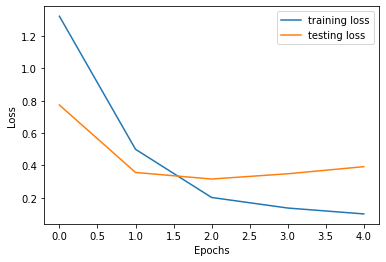

In [53]:
plt.plot(r1['Epochs'],r1['loss'],label='training loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

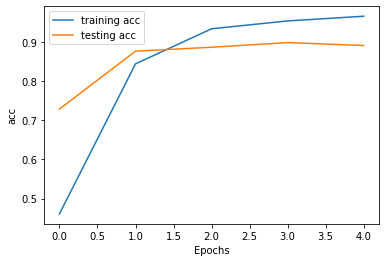

In [54]:
plt.plot(r1['Epochs'],r1['acc'],label='training acc')
plt.plot(r1['Epochs'],r1['val_acc'],label='testing acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [55]:
ypred = m1.predict(X_test)
ypred[:5]

array([[2.5295256e-05, 2.3536481e-05, 4.1219013e-04, 7.7224814e-07,
        9.9953806e-01, 1.5798781e-07],
       [9.2705401e-12, 1.6347838e-13, 9.9999917e-01, 7.5843883e-07,
        1.4928480e-07, 8.0968164e-13],
       [2.6212297e-07, 1.7105943e-07, 1.3323081e-06, 9.0153973e-09,
        9.9999821e-01, 1.0011655e-09],
       [8.6322025e-09, 8.3844892e-10, 9.9999237e-01, 6.2247009e-06,
        1.4320540e-06, 1.4509857e-09],
       [1.7037441e-09, 2.1881268e-09, 2.4262499e-07, 1.2377236e-11,
        9.9999976e-01, 7.2320334e-13]], dtype=float32)

In [56]:
ypred_m1 = [np.argmax(i) for i in ypred]
print(ypred_m1[:5])

[4, 2, 4, 2, 4]


In [57]:
from sklearn.metrics import confusion_matrix,classification_report

In [58]:
cm = confusion_matrix(Y_test,ypred_m1)
print(cm)
print(classification_report(Y_test,ypred_m1))

[[201  12   6   1  12   0]
 [  1 148   1   1  11   7]
 [  4   3 476  13  11   3]
 [  1   1  36 104   7   2]
 [  2   3  18   4 458   1]
 [  0   9   2   0   2  39]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       232
           1       0.84      0.88      0.86       169
           2       0.88      0.93      0.91       510
           3       0.85      0.69      0.76       151
           4       0.91      0.94      0.93       486
           5       0.75      0.75      0.75        52

    accuracy                           0.89      1600
   macro avg       0.87      0.84      0.85      1600
weighted avg       0.89      0.89      0.89      1600



In [59]:
df.sample(10)

,sentence,emotions
14871,I m feel,sadness
9847,realise karin s produce book feel keen worry time,joy
14390,speak know feel successful prettiest version w...,joy
14831,try describe experience word feel like try sho...,love
1176,feel peaceful unafraid certain god good intere...,joy
915,feel wronged world,anger
8060,tad jade stop booth rep recite memorize spiel ...,surprise
14456,feel curious subject matter,surprise
9864,I m feel pretty smug go yesterday instead wait,joy
15104,feel pleased healthy pregnancy,joy


In [60]:
test_df = pd.DataFrame({'sentence':['I love solo travelling',
                                    'Delighted to start my new job',
                                   'Challenges brining my morale down',
                                   'Her absence was painful',
                                   'His presence annoys me']})

In [61]:
test_df

,sentence
0,I love solo travelling
1,Delighted to start my new job
2,Challenges brining my morale down
3,Her absence was painful
4,His presence annoys me


In [62]:
sequences = tk.texts_to_sequences(x)
x_pad = pad_sequences(sequences,maxlen=max_len)

In [63]:
tokens = tk.texts_to_sequences(test_df['sentence'])

test_sent = pad_sequences(tokens, maxlen=max_len)
# print(test_sent)
emotions = m1.predict(test_sent)
print(emotions)

[[4.5261528e-02 4.1200519e-02 4.2975655e-01 3.1259036e-01 8.4603004e-02
  8.6588033e-02]
 [2.6011912e-03 3.5027750e-03 9.5623839e-01 2.3604643e-02 1.1149347e-02
  2.9036629e-03]
 [1.0254871e-01 3.9716974e-01 4.4873610e-02 1.5397020e-02 3.7178952e-01
  6.8221360e-02]
 [2.2565383e-03 1.3709352e-03 1.3579027e-01 1.0119813e-03 8.5943663e-01
  1.3364191e-04]
 [1.3686515e-01 2.8516155e-01 1.3175790e-01 7.8058705e-02 2.2446756e-01
  1.4368911e-01]]


In [64]:
emotions_test = [np.argmax(i) for i in emotions]
print(emotions_test)

[2, 2, 1, 4, 1]


In [65]:
# joy         5361
# sadness     4666
# anger       2159
# fear        1937
# love        1304
# surprise     572

# 2: 5361, 4: 4666, 0: 2159, 1: 1937, 3: 1304, 5: 572

In [66]:
def map_lab_2emotions(data):
    res = []
    d = {0:'anger',1:'fear',2:'joy',3:'love',4:'sadness',5:'surpise'}
    for i in data:
        if i in d.keys():
            res.append(d[i]) 
    return res

In [67]:
pred_emotions = map_lab_2emotions(emotions_test)
print(pred_emotions)

['joy', 'joy', 'fear', 'sadness', 'fear']


In [68]:
test_df['pred_emotions'] = pred_emotions
test_df

,sentence,pred_emotions
0,I love solo travelling,joy
1,Delighted to start my new job,joy
2,Challenges brining my morale down,fear
3,Her absence was painful,sadness
4,His presence annoys me,fear
